(ch5:dcsbm)=
# Degree-Corrected Stochastic Block Model (DCSBM)

For this network model, we're going to start off with our school example that we covered in {numref}`ch5:sbm`. There are $100$ students, who each attend one of two schools. The edges of the network represent whether a pair of students are friends. If two students attend the same school, they have a higher chance of being friends than if they attend different schools. 

In a lot of real-world networks, this model works pretty effectively. It captures "community structure" in a very succinct way, but it has a glaring weakness. To explore this weakness, we would recommend that more advanced statistics users check out the Appendix {numref}`app:ch12:dcsbms`. Basically, the idea is this: within a given community, we have *no way* to represent fundamental differences between nodes in our SBM. Stated another way, if node $i$ and node $j$ are both in the same commuity, they will, on average, have the same *node degree*, which is a concept that you learned about in {numref}`ch4:prop-net:degree`. Rotating back to our school example to put this into context, on average, students in the network will have the same number of friends. This is referred to as the *degree homogeneity* (the expected degrees are the same) for all nodes in the same community. Fortunately, there is a relatively easy way that we can rectify this issue and obtain a network model which does not suffer from this limitation: the degree-correction vector.

## The degree-correction vector allows us to convey node "importance"

The reason that this equality in the number of expected "friends" for each student is problematic is that in real world networks, some nodes are more "popular" than others. This can be more generically conceptualized as some nodes being more "important" than others, in that they have a higher number of edges on average than other nodes in the network. This is known as *degree heterogeneity*. The first two parameters of the DCSBM are the same as the SBM, in that we have a community assignment vector, and a block matrix.

The way that the degree-heterogeneity is conveyed in a DCSBM is via the degree-correction vector $\vec\theta$, which has $n$ elements (one for each node). For each node $i$, the degree-correction factor $\theta_i$ simply "degree-corrects" the node $i$, by either "amplifying" its expected node degree (meaning, on average, node $i$ will have *more* edges) when $\theta_i > 1$, or "reducing" its expected node degree (meaning, on average, node $i$ will have *fewer* edges) when $\theta_i < 1$. In general, degree correction factors are always taken to be $\geq 0$, which means that we cannot have a negative degree-correction factor. 

Rotating back to our coin flip example from {numref}`ch5:sbm`, let's conceptualize how we can break this down. For a given node pair of nodes $i$ and $j$, we look first at the community assignments of each of these nodes $z_{i}$ and $z_j$. Then, we take the corresponding entry from the block matrix, $b_{z_i z_j}$, which corresponds to the "base" probability that node $i$ and node $j$ are connected. Finally, we inflate (or deflate) this probability based on the degree-correction factors. We obtain a coin which lands on heads with probability $\theta_i \theta_j b_{z_iz_j}$, where $\theta_i$ and $\theta_j$ are the degree-correction factors for nodes $i$ and $j$. This gives us the probability of an edge $(i, j)$ existing between any given pair of nodes $i$ and $j$.

If $\mathbf A$ is a DCSBM random network with $n$ nodes, the community vector $\vec z$, the block matrix $B$, and the degree-correction factor $\vec\theta$, we say that $\mathbf A$ is a $DCSBM_n(\vec z, \vec \theta, B)$ random network. 

## Which possible degree-correction vectors are "valid"?

As you might expect now that we have completed {numref}`ch5:ier` on IER random networks, the DCSBM can be easily tied to the IER random networks. Notice that above, we can take the probability $p_{ij} = \theta_i \theta_j b_{z_i z_j}$. This relationship demonstrates that there is a *slight* condition on the vector $\vec \theta$ in order to ensure that the model that we specify is a valid random network model. In particular, for all pairs of nodes $i$ and $j$, the probability that an edge exists needs to be a probability, which means that it is between $0$ and $1$. 

To make this a little bit more concrete, a simple way to do this would be to develop a procedure for $P$ like we found for the SBM, and then check that $P$ is a matrix where all of its entries are between $0$ and $1$. To do this, we use the degree-correction matrix, which is simply a diagonal matrix whose entries are the degree-correction factors. We will denote this matrix with $n$ rows and $n$ columns by $\Theta$ (uppercase $\theta$, since it is a matrix):

\begin{align*}
    \Theta &= \begin{bmatrix}
        \theta_1 & 0 & \cdots & 0 \\
        0 & \theta_2 & \ddots & \vdots \\
        \vdots & \ddots & \ddots & 0 \\
        0 & \cdots & 0 & \theta_n
    \end{bmatrix}.
\end{align*}

The procedure to generate a probability matrix for a DCSBM is as follows. If $\vec z$ is the community assignment vector and assigns the $n$ nodes of the network to one of $K$ communities (taking values from $1$, $2$, ..., $K$), $\Theta$ is the degree-correction matrix, and $B$ is the $K \times K$ block probability matrix:
1. You begin by constructing a matrix, $Z$, that has $n$ rows and $K$ columns; one row for each node, and one column for each community. 
2. For each node in the network $i$:
    + For each community in the network $k$, if $z_i = k$, then let $z_{ik} = 1$. if $z_i \neq k$, then let $z_{ik} = 0$. 
3. Let $P = QZBZ^\top Q$.

So, basically the idea is that the probability matrix $P$ is obtained in the exact same way as we obtained a probability matrix for an SBM, but we simply prepend (and append) the computation with the degree-correction matrix. 

To ensure that the degree-correction vector is "valid", all that we need to do is check that the resulting probability matrix $P$ with $n$ rows and $n$ columns has entries between $0$ and $1$.

## How do you simulate samples of a $DCSBM_n(\vec z, \vec \theta, B)$ random network?

While `graspologic` and `networkx` do not have utilities built-in to allow us to simulate samples of a DCSBM directly, we can use the tools we have just developed to write our own simulation ourselves. The procedure below will produce for you a network $A$, which has nodes and edges, where the underlying random network $\mathbf A$ is a DCSBM random network:

```{admonition} Simulating a sample from a DCSBM_n(\vec z, \vec \theta, B)$ random network
1. Choose a community assignment vector, $\vec z$, for each of the $n$ nodes. Each node should be assigned to one of $K$ communities.
2. Choose a block matrix, $B$, for each pair of the $K$ communities. 
3. Choose a degree-correction vector, $\vec\theta$, which has non-negative entries corresponding to the "importance" for each of the $n$ nodes.
4. Compute the community-assignment matrix $Z$ as-per {numref}``, and the degree-correction matrix $\Theta$, as-per above.
5. Let $P = QZBZ^\top Q$.
6. Validate that $P$ is a valid probability matrix.
7. Use the procedure outlined in {numref}`` to simulate an adjacency matrix $A$ from an $IER_n(P)$ random network. The resulting adjacency matrix is also a sample of a $DCSBM_n(\vec z, \vec \theta, B)$ random network. 
```

Let's see how this works out in practice. In our example, we'll assume that students are "ordered" by their popularity, via a degree-correction vector that declines from $1$ to $0.5$ in the first community, and then has the same set of values for the second community:

In [22]:
import numpy as np
from graspologic.simulations import sample_edges

def make_community_mtx(z):
    """
    A function to generate the one-hot-encoded community
    assignment matrix from a community assignment vector.
    """
    K = len(np.unique(z))
    n = len(z)
    Z = np.zeros((n, K))
    for i, zi in enumerate(z):
        Z[i, zi - 1] = 1
    return Z

def generate_dcsbm_prob_mtx(z, theta, B):
    """
    A function to generate the probability matrix for a
    DCSBM.
    """
    Z = make_community_mtx(z)
    Theta = np.diag(theta)
    # follow the equation above
    return Theta @ Z @ B @ Z.transpose() @ Theta

def dcsbm(z, theta, B, directed=False, loops=False):
    """
    A function to sample a DCSBM.
    """
    P = generate_dcsbm_prob_mtx(z, theta, B)
    return sample_edges(P, directed=directed, loops=loops)

nk = 50  # 50 students per school
z = [1 for i in range(nk)] + [2 for i in range(nk)]
B = np.array([[0.6, 0.2], [0.2, 0.4]])  # same probabilities as from SBM section
theta = np.tile(np.linspace(1, 0.5, nk), 2)
P = generate_dcsbm_prob_mtx(z, theta, B)
A = dcsbm(z, theta, B)

(100,)


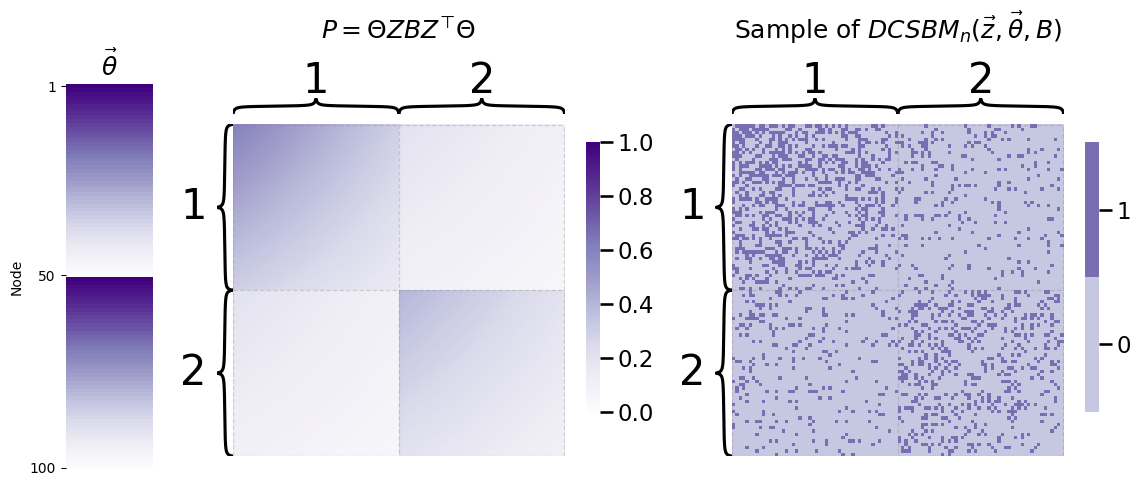

In [41]:
from matplotlib import pyplot as plt
from graphbook_code import heatmap
import seaborn as sns
from graphbook_code import cmaps

def plot_tau(tau, title="", ax=None, ylab="Node"):
    cmap = sns.color_palette(cmaps["sequential"], as_cmap=True)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,2))
    with sns.plotting_context("talk", font_scale=1):
        ax = sns.heatmap(tau, cmap=cmap,
                        ax=ax, yticklabels=False,
                        xticklabels=False, cbar=False)
        ax.set_title(title)
        ax.set(ylabel=ylab)
        ax.set_yticks([.5,49.5,99.5])
        ax.set_yticklabels(["1", "50", "100"])
    return

fig, axs = plt.subplots(1, 3,figsize=(14, 5), gridspec_kw={"width_ratios": [0.1, 0.5, 0.5]})
plot_tau(theta.reshape((-1, 1)), title="$\\vec \\theta$", ax=axs[0])
heatmap(P, ax=axs[1], title="$P = \\Theta Z B Z^\\top \\Theta$", vmin=0, vmax=1, inner_hier_labels=z)
heatmap(A.astype(int), ax=axs[2], title="Sample of $DCSBM_n(\\vec z, \\vec \\theta, B)$", inner_hier_labels=z);

Notice that the edge probabilities are no longer uniform across the entire community; rather, some nodes within a particular community have a higher edge probability than others in general, which is a reflection of the degree-correction vector $\vec \theta$. 

## References

There are a number of great references on the DCSBM. Our favorites are {cite:p}`Dasgupta2004Oct`, {cite:p}`Karrer2011Jan`, and {cite:p}`Gao2018Oct`. If you want a deeper overview of the DCSBM, check out Appendix {numref}`app:ch12:dcsbms`.

```{bibliography}
:filter: docname in docnames
:style: unsrt
```